Installing Dependencies

In [1]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load order data

In [3]:
orders_df = pd.read_csv("../data/orders.csv")

orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

orders_df.head()


,order_id,user_id,book_id,quantity,total_price,order_date
0,101,1,16,2,166.72,2025-05-31 02:06:00
1,102,9,18,1,69.22,2025-06-23 19:07:00
2,103,9,1,2,139.96,2025-07-31 19:10:00
3,104,9,6,1,96.65,2025-07-22 22:19:00
4,105,1,3,1,67.65,2025-05-06 11:57:00


Grouping order with dates and summing up the quantity and price

In [4]:
daily_summary = orders_df.groupby('order_date').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

daily_summary.columns = ['Date', 'Total_Quantity_Sold', 'Total_Revenue']

daily_summary.head()


,Date,Total_Quantity_Sold,Total_Revenue
0,2025-05-01 01:49:00,2,66.88
1,2025-05-01 09:47:00,2,135.30
2,2025-05-01 15:52:00,1,27.85
3,2025-05-01 18:11:00,3,167.37
4,2025-05-01 18:23:00,2,193.30


Visualisation

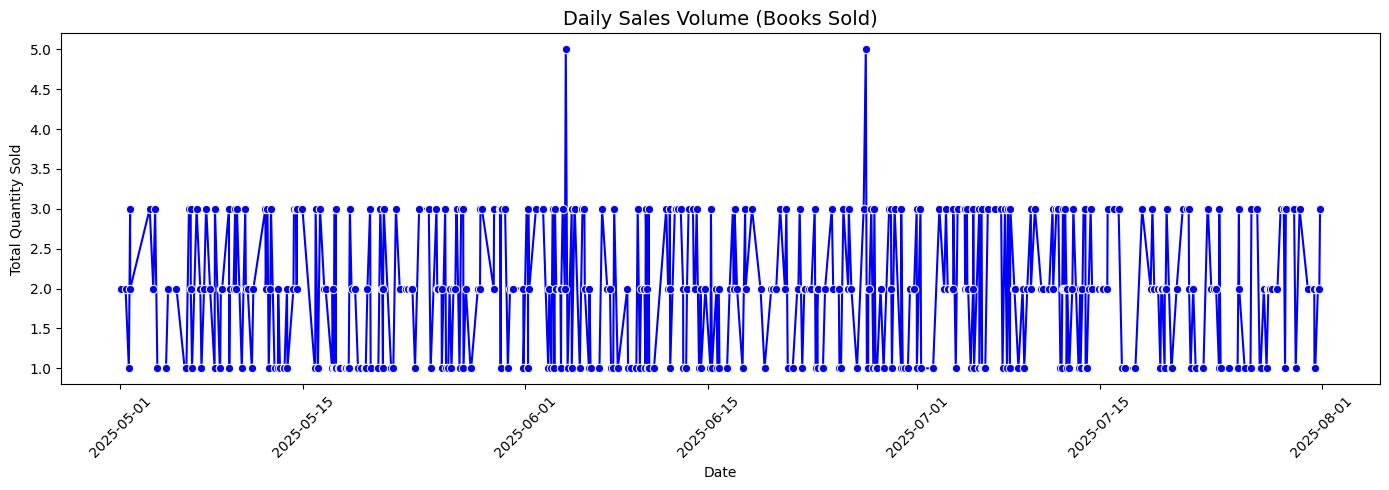

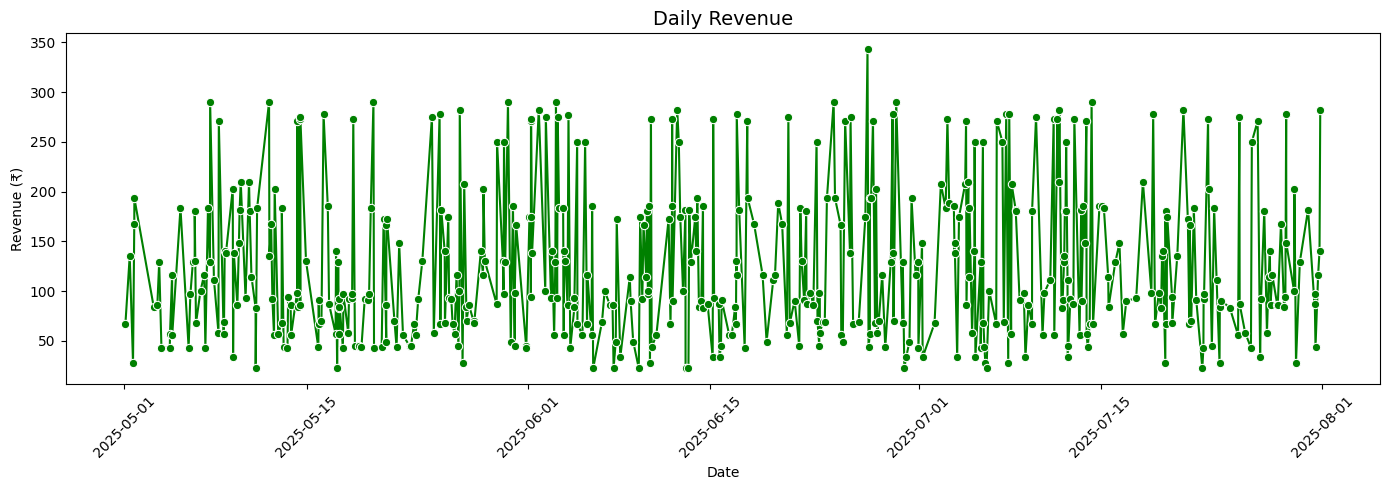

In [5]:
# --- Plot 1: Daily Sales Volume ---
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_summary, x='Date', y='Total_Quantity_Sold', marker='o', color='blue')
plt.title('Daily Sales Volume (Books Sold)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Daily Revenue ---
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_summary, x='Date', y='Total_Revenue', marker='o', color='green')
plt.title('Daily Revenue', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Weekly and Monthly sales summary

In [6]:
weekly_summary = orders_df.copy()
weekly_summary['Week'] = weekly_summary['order_date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_summary = weekly_summary.groupby('Week').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

weekly_summary.columns = ['Week', 'Total_Quantity_Sold', 'Total_Revenue']

monthly_summary = orders_df.copy()
monthly_summary['Month'] = monthly_summary['order_date'].dt.to_period('M').astype(str)

monthly_summary = monthly_summary.groupby('Month').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

monthly_summary.columns = ['Month', 'Total_Quantity_Sold', 'Total_Revenue']


In [7]:
weekly_summary

,Week,Total_Quantity_Sold,Total_Revenue
0,2025-04-28,25,1204.99
1,2025-05-05,67,4425.68
2,2025-05-12,82,5118.13
3,2025-05-19,59,3613.82
4,2025-05-26,84,5235.23
5,2025-06-02,78,4618.88
6,2025-06-09,84,5428.24
7,2025-06-16,62,3781.91
8,2025-06-23,76,5387.61
9,2025-06-30,75,4650.16


In [8]:
monthly_summary

,Month,Total_Quantity_Sold,Total_Revenue
0,2025-05,299,18190.04
1,2025-06,328,21188.99
2,2025-07,320,20950.14


Visualisation of weekly and monthly summary

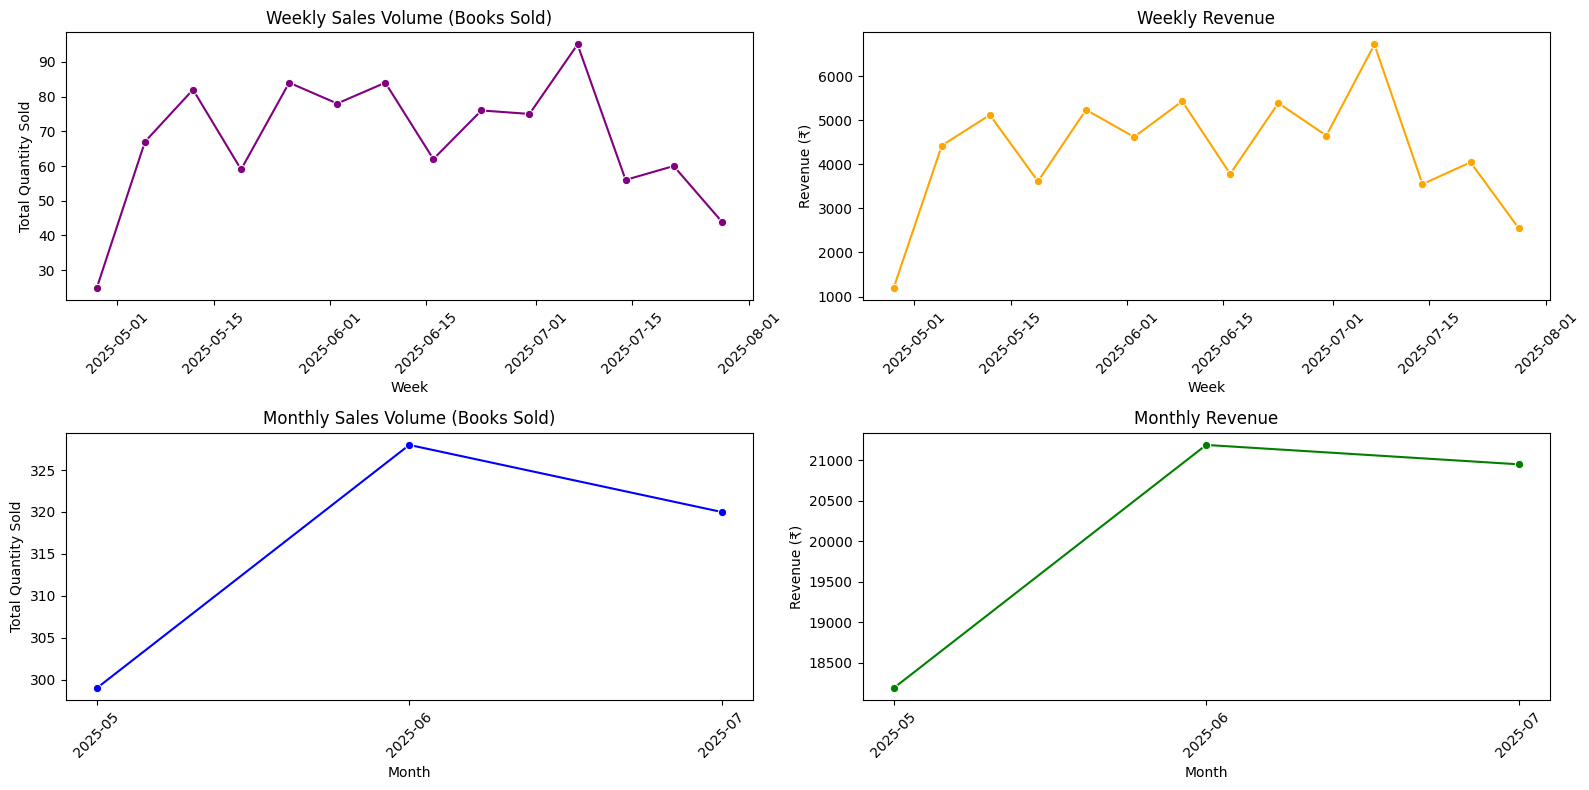

In [9]:
plt.figure(figsize=(16, 8))

# Plot 1: Weekly Quantity Sold
plt.subplot(2, 2, 1)
sns.lineplot(data=weekly_summary, x='Week', y='Total_Quantity_Sold', marker='o', color='purple')
plt.title('Weekly Sales Volume (Books Sold)')
plt.xlabel('Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)

# Plot 2: Weekly Revenue
plt.subplot(2, 2, 2)
sns.lineplot(data=weekly_summary, x='Week', y='Total_Revenue', marker='o', color='orange')
plt.title('Weekly Revenue')
plt.xlabel('Week')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)

# Plot 3: Monthly Quantity Sold
plt.subplot(2, 2, 3)
sns.lineplot(data=monthly_summary, x='Month', y='Total_Quantity_Sold', marker='o', color='blue')
plt.title('Monthly Sales Volume (Books Sold)')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)

# Plot 4: Monthly Revenue
plt.subplot(2, 2, 4)
sns.lineplot(data=monthly_summary, x='Month', y='Total_Revenue', marker='o', color='green')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Category wise sales report

Loading books data

In [10]:
books_df = pd.read_csv("../data/books.csv")

In [11]:
books_df.columns.to_list()

['book_id', 'title', 'author', 'category', 'price', 'stock_quantity']

Merging required fields

In [12]:
orders_df = pd.merge(orders_df, books_df[['book_id', 'title', 'category']], on='book_id', how='left')

C:\Users\Priti Mondal\AppData\Local\Temp\ipykernel_23392\1343384686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='Total_Revenue', y='Category', palette='viridis')


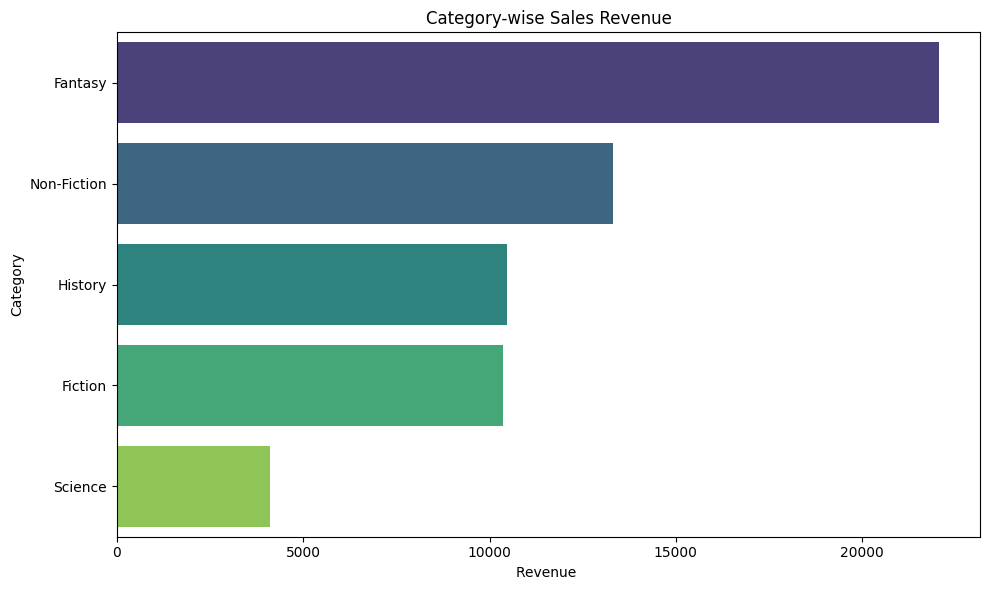

In [13]:
category_summary = orders_df.groupby('category').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

category_summary.columns = ['Category', 'Total_Quantity_Sold', 'Total_Revenue']
category_summary = category_summary.sort_values(by='Total_Revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary, x='Total_Revenue', y='Category', palette='viridis')
plt.title("Category-wise Sales Revenue")
plt.xlabel("Revenue ")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


Book wise sales report

In [14]:
orders_df.columns.to_list()

['order_id',
 'user_id',
 'book_id',
 'quantity',
 'total_price',
 'order_date',
 'title',
 'category']

C:\Users\Priti Mondal\AppData\Local\Temp\ipykernel_23392\4129452857.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=book_summary, x='Total_Revenue', y='Book_Title', palette='mako')


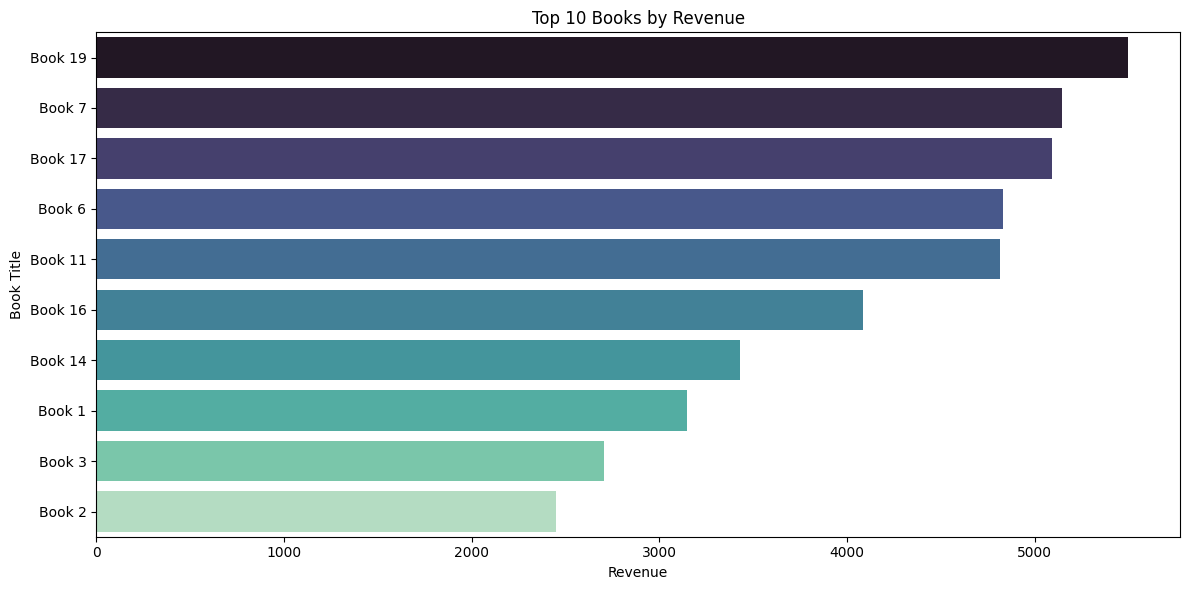

In [15]:
book_summary = orders_df.groupby('title').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

book_summary.columns = ['Book_Title', 'Total_Quantity_Sold', 'Total_Revenue']
book_summary = book_summary.sort_values(by='Total_Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=book_summary, x='Total_Revenue', y='Book_Title', palette='mako')
plt.title("Top 10 Books by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()


Sales heatmap

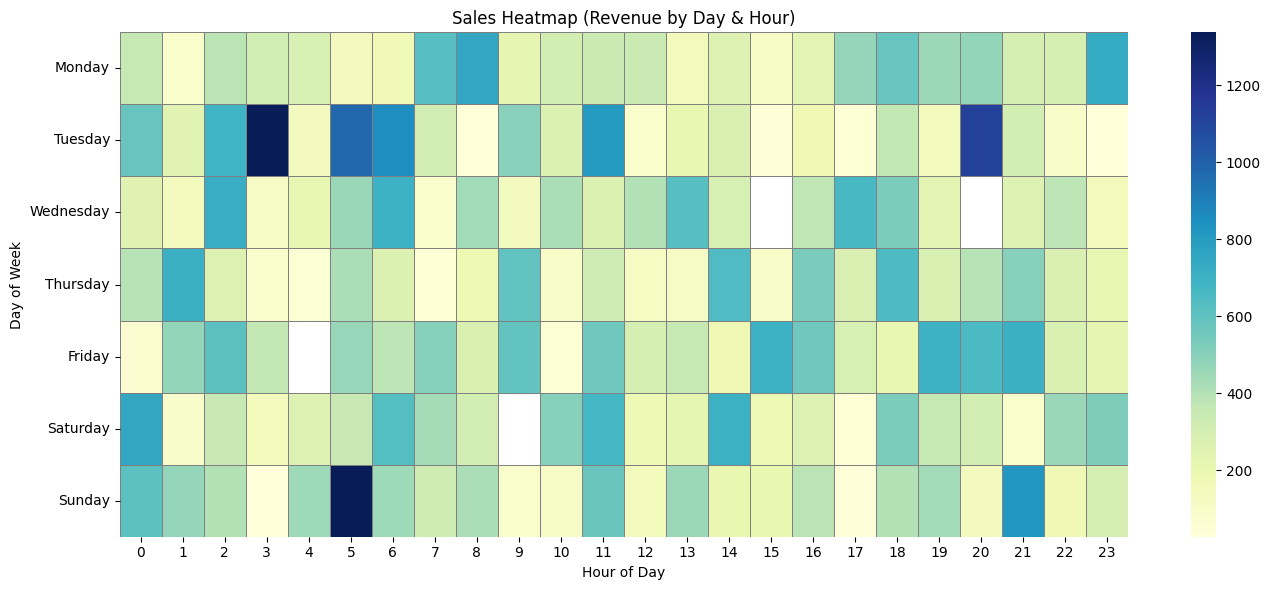

In [16]:
orders_df['DayOfWeek'] = orders_df['order_date'].dt.day_name()
orders_df['Hour'] = orders_df['order_date'].dt.hour

heatmap_data = orders_df.pivot_table(index='DayOfWeek', columns='Hour', values='total_price', aggfunc='sum')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title("Sales Heatmap (Revenue by Day & Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


In [17]:
orders_df.columns.to_list()

['order_id',
 'user_id',
 'book_id',
 'quantity',
 'total_price',
 'order_date',
 'title',
 'category',
 'DayOfWeek',
 'Hour']

Exporting summary to Pdf

In [18]:
!pip install fpdf


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Book Store - Sales Summary Report", ln=1, align='C')

pdf.set_font("Arial", size=12)
pdf.ln(10)
pdf.cell(200, 10, txt=f"Total Orders: {len(orders_df)}", ln=1)
pdf.cell(200, 10, txt=f"Date Range: {orders_df['order_date'].min().date()} to {orders_df['order_date'].max().date()}", ln=1)
pdf.cell(200, 10, txt=f"Total Revenue: {orders_df['total_price'].sum():,.2f}", ln=1)
pdf.cell(200, 10, txt=f"Total Books Sold: {orders_df['quantity'].sum()}", ln=1)

pdf.output("../exports/sales_summary.pdf")
print("Exported sales_summary.pdf to 'exports/' folder.")


Exported sales_summary.pdf to 'exports/' folder.


Insights

Best sales day

In [20]:
best_day = daily_summary.sort_values(by='Total_Revenue', ascending=False).head(1)
print("Best Sales Day:")
print(best_day)

Best Sales Day:
                   Date  Total_Quantity_Sold  Total_Revenue
294 2025-06-27 01:54:00                    5         342.96


Worst sales day

In [21]:
worst_day = daily_summary.sort_values(by='Total_Revenue', ascending=True).head(1)
print("Worst Sales Day:")
print(worst_day)

Worst Sales Day:
                   Date  Total_Quantity_Sold  Total_Revenue
313 2025-06-29 21:47:00                    1          22.39


Average Daily Revenue and Quantity

In [22]:
avg_revenue = daily_summary['Total_Revenue'].mean()
avg_quantity = daily_summary['Total_Quantity_Sold'].mean()

print(f"Average Daily Revenue: ₹{avg_revenue:,.2f}")
print(f"Average Books Sold per Day: {avg_quantity:.2f}")


Average Daily Revenue: ₹126.21
Average Books Sold per Day: 1.98


Peek month and week

In [23]:
peak_month = monthly_summary.sort_values(by='Total_Revenue', ascending=False).head(1)
print("Peak Month:")
print(peak_month)

peak_week = weekly_summary.sort_values(by='Total_Revenue', ascending=False).head(1)
print("Peak Week:")
print(peak_week)


Peak Month:
     Month  Total_Quantity_Sold  Total_Revenue
1  2025-06                  328       21188.99
Peak Week:
         Week  Total_Quantity_Sold  Total_Revenue
10 2025-07-07                   95         6716.1


Day with zero sales

In [24]:
zero_sales_days = daily_summary[daily_summary['Total_Revenue'] == 0]
print(f"Days with Zero Revenue: {len(zero_sales_days)}")
print(zero_sales_days[['Date']])

Days with Zero Revenue: 0
Empty DataFrame
Columns: [Date]
Index: []


Top 5 revenue generating days

In [25]:
top_5_days = daily_summary.sort_values(by='Total_Revenue', ascending=False).head(5)
print("Top 5 Revenue Days:")
print(top_5_days)


Top 5 Revenue Days:
                   Date  Total_Quantity_Sold  Total_Revenue
294 2025-06-27 01:54:00                    5         342.96
283 2025-06-24 11:28:00                    3         289.95
97  2025-05-20 03:06:00                    3         289.95
148 2025-05-30 11:06:00                    3         289.95
169 2025-06-03 03:34:00                    3         289.95


Exporting insights summary in pdf

In [26]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Sales Insights Report", ln=1, align='C')
pdf.set_font("Arial", '', 12)
pdf.ln(10)

pdf.cell(200, 10, txt=f"Best Sales Day: {best_day.iloc[0]['Date']} - {best_day.iloc[0]['Total_Revenue']:,.2f}", ln=1)
pdf.cell(200, 10, txt=f"Worst Sales Day: {worst_day.iloc[0]['Date']} - {worst_day.iloc[0]['Total_Revenue']:,.2f}", ln=1)
pdf.cell(200, 10, txt=f"Avg Daily Revenue: {avg_revenue:,.2f}", ln=1)
pdf.cell(200, 10, txt=f"Avg Books Sold/Day: {avg_quantity:.2f}", ln=1)

pdf.ln(5)
pdf.cell(200, 10, txt=f"Peak Month: {peak_month.iloc[0]['Month']} - {peak_month.iloc[0]['Total_Revenue']:,.2f}", ln=1)
pdf.cell(200, 10, txt=f"Peak Week: {peak_week.iloc[0]['Week'].strftime('%Y-%m-%d')} - {peak_week.iloc[0]['Total_Revenue']:,.2f}", ln=1)
pdf.cell(200, 10, txt=f"Days with Zero Revenue: {len(zero_sales_days)}", ln=1)

pdf.ln(10)
pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Top 5 Revenue Days:", ln=1)
pdf.set_font("Arial", '', 12)

for index, row in top_5_days.iterrows():
    pdf.cell(200, 10, txt=f"{row['Date']} - {row['Total_Revenue']:,.2f}", ln=1)

pdf.output("../exports/sales_insights.pdf")
print("Exported 'sales_insights.pdf' to 'exports/' folder.")


Exported 'sales_insights.pdf' to 'exports/' folder.
